In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_excel(r"E:\Data Science\Assignment-6\boston.xls")
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.099998  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.699997  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.300003  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.800003  2.5050    1  273   

            PT           B  LSTAT         MV  
0    15.300000  

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [16]:
#check the type of  data
df.dtypes

CRIM     float64
ZN       float64
INDUS    float64
CHAS       int64
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD        int64
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object

In [17]:
x = df.drop('MV',axis=1).copy()
y = df["MV"]

In [18]:
#performing train test spliiting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [20]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

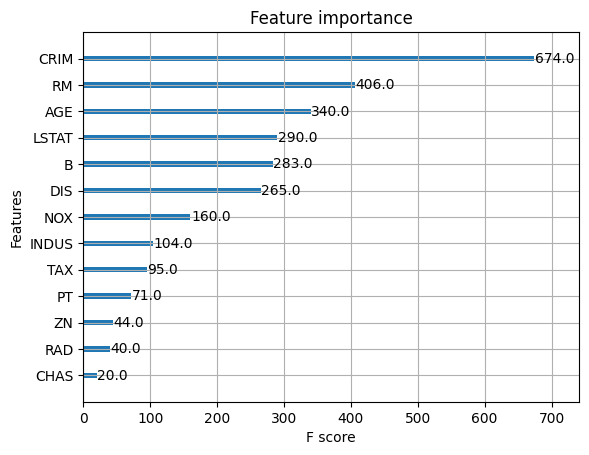

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb

xgb.plot_importance(model,ax=plt.gca())

In [29]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_train)

print("Accuracy:",r2_score(y_train, y_pred))

Accuracy: 0.9999972108574199


In [37]:
#cgboost regression train model accuracy
model.score(X_train,y_train)

0.9999972108574199

In [30]:
#xgboost regression test model accuracy
model.score(X_test,y_test)

0.8796610136280955

In [31]:
y_pred = model.predict(X_test)
print("Accuracy:",r2_score(y_test, y_pred))

Accuracy: 0.8796610136280955


In [33]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

In [35]:
#linear regression train model accuracy
LR.score(X_train,y_train)

0.7356392573597244

In [36]:
#linear regression test model accuracy
LR.score(X_test,y_test)

0.7484286602745198